# 1. Identitas

* Nama : Muhammad Itsar Rabbani
* Batch 06
* Milestone 01 Phase 02
* Objective :
  * Make a neural network model to predict the churn of PT. Telco Communication of products chosen by consumers where the products owned by PT. Telco include phone service, internet service (including internet security)
  * Perform analysis on customers of PT. Telco use communication services chosen by customers

# 2. Import Pustaka

In [1]:
!pip install dataprep

     |████████████████████████████████| 3.5 MB 5.1 MB/s 
     |████████████████████████████████| 848 kB 55.9 MB/s 
     |████████████████████████████████| 158 kB 58.3 MB/s 
     |████████████████████████████████| 366 kB 65.7 MB/s 
     |████████████████████████████████| 719 kB 69.0 MB/s 
     |████████████████████████████████| 10.9 MB 46.6 MB/s 
     |████████████████████████████████| 1.5 MB 53.1 MB/s 
     |████████████████████████████████| 943 kB 53.5 MB/s 
     |████████████████████████████████| 1.1 MB 64.6 MB/s 
     |████████████████████████████████| 63 kB 3.5 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 73.1 MB/s 
     |████████████████████████████████| 271 kB 66.8 MB/s 
     |████████████████████████████████| 133 kB 63.6 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 1.5 MB 66.5 MB/s 
     |████████████████████████████████| 1.5 MB 61.1 MB/s 
     |██████████████

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import create_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, concatenate, Normalization, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import losses
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

NumExpr defaulting to 2 threads.


# 3. Data Load

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tsrrbbn040/dp-draftproject/raw_files/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#dimensionality of df
df.shape

(7043, 21)

In [5]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#also data info but only about dtypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#looking for missing value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#searching for duplicated data
df.duplicated().value_counts()

False    7043
dtype: int64

# 4. Data Cleaning

From the syntax we run above, we can conclude that our data contains 18 categorical data and 3 numerical data. Thankfully there are no feature that contains missing value. But the problem is when we look deeper into the data, ```TotalCharges``` column has an object dtypes. While its value is about numeric. So there is an anomaly in our data that we should investigate deeper.

In [9]:
#look deeper on TotalCharger Column
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
#look deeper (2)
df.TotalCharges.value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
4718.25     1
2542.45     1
1993.2      1
7467.5      1
2407.3      1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
#look deeper (3)
df.select_dtypes(object).describe().T

,count,unique,top,freq
customerID,7043,7043,0260-ZDLGK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Ignore the ```CustomerID``` column. But all of 4 step conclude to proof that our assumption for ```TotalCharges``` column was correct. It is very rare that a column to which all data values are numeric is included in the dtypes object. Especially in the second step of extracting information, we saw 11 times "empty numbers" through the ```value_counts``` syntax. So we have to handle this problem

In [12]:
df[df['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


So ya, basically they are our suspect (missing values) from this dataset.

In [13]:
#convert the empty value of data into NaN
df = df.replace(' ', np.NaN)

In [14]:
#re-check
df.TotalCharges.value_counts()

20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
           ..
4718.25     1
2542.45     1
1993.2      1
7467.5      1
2407.3      1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Yup, apparently our impostor have become NaN values. So we have to handle this also

In [16]:
#deciding whether to drop or fill the NaN values
print('Ratio NaN Values:', df['TotalCharges'].isnull().sum()*100/len(df))

Ratio NaN Values: 0.15618344455487718


Because our little friend only has a ratio of 0.15 percent NaN values. So we just decided to drop the data

In [17]:
#drop NaN
df.dropna(inplace=True)

One other thing we haven't done yet is that we haven't changed the dtypes of the ```TotalCharges``` column. Let's do it

In [18]:
#because this column has a non-integer value (comma), so we change it to float64 dtypes
df['TotalCharges'] = df['TotalCharges'].astype('float64')

#checking the updated data
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# 5. Eksplorasi Data

In [19]:
#drop customerID
df.drop(columns=['customerID'], inplace=True)

In [20]:
report = create_report(df)
report.save('Telco Churn') #html format
report.show_browser

Report has been saved to Telco Churn.html!


<bound method Report.show_browser of >

[Data Insight with Dataprep.eda Module](https://drive.google.com/file/d/10QsuhWz6uuQalzTnZ73AtN2Eh1l4AkB7/view?usp=sharing)

Size : 35 MB

Clue : Download and Open with Chrome

1. There is a column whose value is not the actual data but the result of encoding, namely the 'SeniorCitizen' column.
2. There's not much to explore through dataprep.eda except the number of values inside the column itself. Such as
3. Identity Features
  * Gender Male is 50.47% while Gender Female is 40.53%
  * Senior Citizen (value:1) about 16.24% while Non-Senior Citizen (value:0)
  * Some customers have their partner while the other is not. Whereas 'no' partner about 51.75% and 'yes' partner about 48.25%
4. Phone Service Features
  * There is 90.33% customers who have Phone Service while the rest (9.67%) is not
  * Dig deeper, some customers who use phone service are using multiplelines services (42.19%) while the remaining customers (48.14%) did not use multiplelines services.
5. Internet Service Features contain three category which is fiber optic, DSL, and they who did not use internet service.
  * Number of customers using fiber optic services approximately 44.03% while the customers whos using DSL service around 34.36%. And the rest or about 21.62% customers did not use internet service
  * Although there are differences in the use of network types between fiber optic and DSL, the two types of customers also have their own preferences for using other customer features.
  * For example, from a total of 5512 who use internet service, 3497 of them do not use the online security feature, while in 2015 the remaining customers use online security services.
  * Another example of 5512 customers who use internet service, 3087 of them do not use the online backup feature, while the remaining 2425 customers use online backup services. And the others, like
  * Device Protection ON 2418 customers. Device Protection OFF 3094 customers.
  * Tech Support ON, 2040 customers. Tech Support OFF, 3472 customers.
  * TV Streaming, 2703 customers. No TV Streaming, 2809 customers.
  * Movies Streaming, 2731 customers. No Movies Streaming, 2781 customers.

6. Bills Features
  * **Contract**. From 7032 customers, 55.11% of them only use Telco services with a short contract term (monthly). While those who use Telco services with a 1-year contract are only 20.93% and customers with a 2-year contract are only 23.96%
  * **Paperless Billing**. Some of them or as much as 59.27% use paperless billing services (environtment friendly) and some others or 40.73% do not use paperless billing
  * **Payment Method**. Telcos provide four types of payments to their customers, namely using e-check, mailed check, bank transfer, and credit card. For the composition, those who use e-check are 33.63%, mailed check 22.81%, bank transfer 21.93%, and credit card 21.63%.
  * Monthly Charges
    * Min : 18.25
    * Max : 118.75
    * Range : 100.50
    * Q1 : 35.58
    * MED : 70.35
    * Q3 : 89.86
    * Mean : 64.79
    * Std Dev : 30.086
    * Variance : 905.16
    * Kurtosis : -1.2561
    * Coefficient of Variation : 0.4643
  * Total Charges
    * Min : 18.80
    * Max : 8684.80
    * Range : 8666
    * Q1 : 401.45
    * MED : 1397.47
    * Q3 : 3794.73
    * Mean : 2283.30
    * Std Dev : 2266.771
    * Variance : 5.1383e+06
    * Kurtosis : -0.2325
    * Coefficient of Variation : 0.9928
7. Target (Churn). Contain Imbalance whereas:
    * 5163 / 73.42% No Churn
    * 1869 / 26.58% Yes Churn


# 6. Data Pre-Processing

### Pre-Feature Engineering

In [21]:
new = df.copy()
new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the syntax above, we can conclude that we have to normalize the value inside the categorical features. Such as replace the ' ' value with '_'. Also we have to lowercase it. Plus we have to reconfigure a few categorical columns that only contains Yes/No answer

In [22]:
#lowercase
new['Partner'] = new['Partner'].str.lower()
new['Dependents'] = new['Dependents'].str.lower()
new['PhoneService'] = new['PhoneService'].str.lower()
new['PaperlessBilling'] = new['PaperlessBilling'].str.lower()

#lowercase + replace specific
new['MultipleLines'] = new['MultipleLines'].str.lower().str.replace(' ', '_')
new['InternetService'] = new['InternetService'].str.lower().str.replace(' ', '_')
new['OnlineSecurity'] = new['OnlineSecurity'].str.lower().str.replace(' ', '_')
new['OnlineBackup'] = new['OnlineBackup'].str.lower().str.replace(' ', '_')
new['DeviceProtection'] = new['DeviceProtection'].str.lower().str.replace(' ', '_')
new['TechSupport'] = new['TechSupport'].str.lower().str.replace(' ', '_')
new['StreamingTV'] = new['StreamingTV'].str.lower().str.replace(' ', '_')
new['StreamingMovies'] = new['StreamingMovies'].str.lower().str.replace(' ', '_')
new['Contract'] = new['Contract'].str.lower().str.replace(' ', '_')
new['PaymentMethod'] = new['PaymentMethod'].str.lower().str.replace(' ', '_')

new['Churn'] = new['Churn'].map({'No':0, 'Yes':1})


In [23]:
new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,Male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,Male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,Male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,Female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


### Split Into Data Feature & Data Target --> Train Test Split

In [24]:
X = new.drop(columns=['Churn'], axis=1)
y = new.Churn

In [25]:
#first split into X_train and X_remaining 70:30
X_train, X_rem, y_train, y_rem = train_test_split(X, y, stratify = y, train_size=0.8)

#second split. from X_remain to X_val+X_test 15:15
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print("Input Training:", X_train.shape), print("Output Training:", y_train.shape)
print("Input Val:", X_val.shape), print("Output Val:", y_val.shape)
print("Input Test:", X_test.shape), print("Output Test:", y_test.shape)

Input Training: (5625, 19)
Output Training: (5625,)
Input Val: (703, 19)
Output Val: (703,)
Input Test: (704, 19)
Output Test: (704,)


(None, None)

In [26]:
print(X_train.columns.tolist())
print('\n')
X_train.head()

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5798,Female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,85.20,474.80
3466,Male,0,yes,yes,72,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,credit_card_(automatic),25.10,1790.80
16,Female,0,no,no,52,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,mailed_check,20.65,1022.95
3729,Male,0,no,no,62,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,yes,credit_card_(automatic),20.05,1201.65
5610,Female,0,no,no,3,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,75.50,220.60


### Feature Engineering Cara 1

source : https://colab.research.google.com/github/ardhiraka/FSDS_Guidelines/blob/master/p1/w4/d4pm_deployment_with_streamlit_flask.ipynb#scrollTo=lnbPm2Xxg1Eo

In [27]:
#separating between categorical n numerical
cat = X_train[['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']]

num = X_train[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

In [28]:
#feature engineering for cat
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
new_cat = cat_encoder.fit_transform(cat)

#feature engineering for num
scaler = StandardScaler()
new_num = scaler.fit_transform(num)

In [29]:
#new dataframe
from sklearn.compose import ColumnTransformer

cat_feat = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']

num_feat = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


transformer = ColumnTransformer([
        ("num", StandardScaler(), num_feat),
        ("cat", OneHotEncoder(), cat_feat),
    ])

fresh_X_train = transformer.fit_transform(X_train)
fresh_X_val = transformer.transform(X_val)
fresh_X_test = transformer.transform(X_test)

### Feature Engineering Cara 2 (manual)

In [30]:
X2 = X.copy()
y2 = y.copy()

In [31]:
#separating between categorical n numerical
cat2 = X2[['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']]

num2 = X2[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

In [32]:
#num
scaler = StandardScaler()
scaler.fit(num2)

#cat
cat_encoded = pd.get_dummies(cat2, drop_first=True)

X_merge = pd.concat([num2, cat_encoded], axis=1)

In [33]:
X_merge.rename(columns = {'gender_Male':'gender',
                          'Partner_yes':'partner',
                          'Dependents_yes':'dependents',
                          'PhoneService_yes':'phone_service',
                          'MultipleLines_no_phone_service':'multiple_lines_nophoneservice', # 1=no phone service. 0= have phone service but no multipelines
                          'MultipleLines_yes':'multiple_lines', # 1=subscribe to multipleline service. 0=not subscribed to multiplelines service
                          'InternetService_fiber_optic':'internet_service', # 1=fiber optic. 0=dsl
                          'InternetService_no':'no_internet_service', # 1=not subscribe to internet service. 0=dsl/fiberoptic
                          'OnlineSecurity_no_internet_service':'onlinesecurity_nois', 
                          'OnlineSecurity_yes':'onlinesecurity', # 1=subscribe to online security. 0=not subsribed to online security
                          'OnlineBackup_no_internet_service':'onlinebackup_nois',
                          'OnlineBackup_yes':'onlinebackup', # 1=subscribe to online backup. 0=not subsribed to online backup
                          'DeviceProtection_no_internet_service':'deviceprotection_nois',
                          'DeviceProtection_yes':'deviceprotection', # 1=subscribe to device protection. 0=not subsribed to device protection
                          'TechSupport_no_internet_service':'techsupport_nois',
                          'TechSupport_yes':'techsupport', # 1=subscribe to tech support. 0=not subsribed to tech support
                          'StreamingTV_no_internet_service': 'streamingtv_nois', 
                          'StreamingTV_yes':'streamingtv', # 1=subscribe to streaming tv. 0=not subsribed to streaming tv
                          'StreamingMovies_no_internet_service':'streamingmovies_nois',
                          'StreamingMovies_yes':'streamingmovies', # 1=subscribe to streaming movies. 0=not subsribed to streaming movies
                          'Contract_one_year':'oneyear_contract',
                          'Contract_two_year':'twoyear_contract',
                          'PaperlessBilling_yes':'paperless_billing',
                          'PaymentMethod_credit_card_(automatic)':'payment_creditcard',
                          'PaymentMethod_electronic_check':'payment_echeck',
                          'PaymentMethod_mailed_check':'payment_mailcheck'}, inplace = True)

In [34]:
X2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85
1,Male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50
2,Male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15


In [35]:
X_merge.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,partner,dependents,phone_service,multiple_lines_nophoneservice,multiple_lines,internet_service,no_internet_service,onlinesecurity_nois,onlinesecurity,onlinebackup_nois,onlinebackup,deviceprotection_nois,deviceprotection,techsupport_nois,techsupport,streamingtv_nois,streamingtv,streamingmovies_nois,streamingmovies,oneyear_contract,twoyear_contract,paperless_billing,payment_creditcard,payment_echeck,payment_mailcheck
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


**When we take a deeper look at the two datasets above and compare them, we will get the hypothesis that the attributs on X_merge dataset is:**


1. **IF internet service : dsl**


    internet service : 0 #1 for fiber 0 for dsl
    internet service no : 0

2. **IF online security = no**.


    online security nois = 0
    online security = 0

3. **IF online security = yes**.


    online security nois = 0
    online security = 1

4. **IF online backup = yes**.


    online backup nois = 0
    online backup yes = 1

5. **IF online backup = no**.


    online backup nois = 0
    online backup no = 0

6. **IF contract = month-to-month**.


    contract one year = 0
    contract two year = 0

7. **IF contract = one year**.


    contract one year = 1
    contract two year = 0

8. **IF contract = two year**.


    contract one year = 0
    contract two year = 1

9. **IF payment methods = electronic check**.


    creditcard = 0
    electronic check = 1
    mailed check = 1

10. **IF payment methods = mailed_check**.


    credit card = 0
    electronic check = 0
    mailed check = 1

11. **IF payment methods = bank transfer**.


    credit card = 0
    electronic check = 0
    mailed check = 0

12. **IF payment methods = credit card**.


    credit card = 1
    electronic check = 0
    mailed check = 0

In [36]:
#convert to tensor
tf.convert_to_tensor(X_merge)

#Using tf.keras Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_merge)

In [37]:
X_train, X_rem, y_train, y_rem = train_test_split(X_merge, y2, stratify = y2, train_size=0.8)

#second split. from X_remain to X_val+X_test 15:15
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print("Input Training:", X_train.shape), print("Output Training:", y_train.shape)
print("Input Val:", X_val.shape), print("Output Val:", y_val.shape)
print("Input Test:", X_test.shape), print("Output Test:", y_test.shape)

Input Training: (5625, 30)
Output Training: (5625,)
Input Val: (703, 30)
Output Val: (703,)
Input Test: (704, 30)
Output Test: (704,)


(None, None)

In [38]:
#scale the data
base_pipeline = Pipeline([('scaler', StandardScaler())])
base_pipeline.fit(X_train)

X_train_trf = base_pipeline.transform(X_train)
X_val_trf = base_pipeline.transform(X_val)
X_test_trf = base_pipeline.transform(X_test)

In [39]:
#coba compile dataset pake tensor slices
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_trf, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_trf, y_val))
val_dataset = val_dataset.batch(64)

#ternyata gakbisa dipake

In [40]:
#save for later
num_pipeline = Pipeline([('scaler', StandardScaler())])
num_attribs = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

cat_attribs = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']

from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
        ])

# 7. Model Definition

In [41]:
#define metrics
metrics_list = [
                keras.metrics.AUC(name='auc'),
                keras.metrics.BinaryAccuracy(name='accuracy'),
                keras.metrics.Recall(name='recall')]

### Sequential API

In [42]:
#clear + random
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
#model
model = Sequential()
model.add(Dense(95, activation='elu', input_shape=(30,)))
model.add(Dense(55, activation='elu'))
model.add(Dense(25, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

#summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 95)                2945      
                                                                 
 dense_1 (Dense)             (None, 55)                5280      
                                                                 
 dense_2 (Dense)             (None, 25)                1400      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9,651
Trainable params: 9,651
Non-trainable params: 0
_________________________________________________________________


### Functional API

In [44]:
#define model
input = Input(shape=(30,))
hidden1 = Dense(100, activation='elu')(input)
hidden2 = Dense(50, activation='elu')(hidden1)
hidden3 = Dense(20, activation='elu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
fun_model = keras.Model(inputs=input, outputs=output)

#summarize
fun_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 100)               3100      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 9,191
Trainable params: 9,191
Non-trainable params: 0
_________________________________________________________________


# 8. Model Training

### Sequential

In [45]:
#compile // training
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=metrics_list)

#callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

#result // evaluation
history = model.fit(X_train_trf, y_train, epochs=30,
                    validation_data=(X_val_trf, y_val))

Epoch 1/30
176/176 [==============================] - 4s 7ms/step - loss: 0.4413 - auc: 0.8239 - accuracy: 0.7899 - recall: 0.5445 - val_loss: 0.4301 - val_auc: 0.8408 - val_accuracy: 0.7909 - val_recall: 0.5959
Epoch 2/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4240 - auc: 0.8388 - accuracy: 0.7956 - recall: 0.5445 - val_loss: 0.4184 - val_auc: 0.8473 - val_accuracy: 0.8080 - val_recall: 0.5699
Epoch 3/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4178 - auc: 0.8445 - accuracy: 0.8037 - recall: 0.5418 - val_loss: 0.4193 - val_auc: 0.8448 - val_accuracy: 0.8051 - val_recall: 0.5492
Epoch 4/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4159 - auc: 0.8459 - accuracy: 0.8068 - recall: 0.5552 - val_loss: 0.4216 - val_auc: 0.8468 - val_accuracy: 0.8151 - val_recall: 0.5803
Epoch 5/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4118 - auc: 0.8498 - accuracy: 0.8059 - recall: 0.5545 - val_loss: 0.4167 - 

In [46]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  auc = history.history['auc']
  val_auc = history.history['val_auc']

  recall = history.history['recall']
  val_recall = history.history['val_recall']

  epochs = range(len(loss))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, auc, label='training_auc')
  plt.plot(epochs, val_auc, label='val_auc')
  plt.title("AUC Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, recall, label='training_recall')
  plt.plot(epochs, val_recall, label='val_recall')
  plt.title("Recall Curves")
  plt.xlabel("Epochs")
  plt.legend()

Base Sequential Model


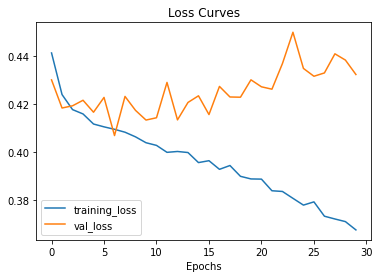

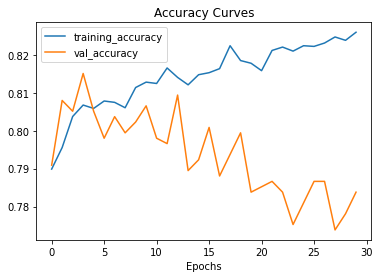

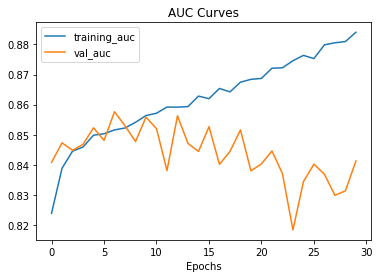

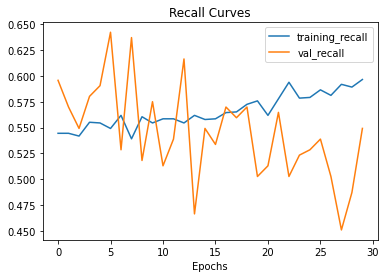

In [47]:
print("Base Sequential Model")
plot_loss_curves(history)

In [48]:
#classification report

thre = 0.5
res1 = model.predict(X_val_trf)
res1 = (res1 > thre).T
res1 = res1.astype(int)[0]

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       510
           1       0.62      0.55      0.58       193

    accuracy                           0.78       703
   macro avg       0.73      0.71      0.72       703
weighted avg       0.78      0.78      0.78       703



### Functional Model

In [50]:
#compile
fun_model.compile(optimizer="SGD", loss="binary_crossentropy", metrics=metrics_list)

#trace
fun_history = fun_model.fit(X_train_trf, y_train, epochs=50, validation_data=(X_val_trf, y_val))

Epoch 1/50
176/176 [==============================] - 2s 6ms/step - loss: 0.4985 - auc: 0.7882 - accuracy: 0.7495 - recall: 0.5545 - val_loss: 0.4502 - val_auc: 0.8271 - val_accuracy: 0.7824 - val_recall: 0.5959
Epoch 2/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4279 - auc: 0.8376 - accuracy: 0.7970 - recall: 0.5572 - val_loss: 0.4360 - val_auc: 0.8340 - val_accuracy: 0.7923 - val_recall: 0.5130
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 0.4227 - auc: 0.8411 - accuracy: 0.8014 - recall: 0.5418 - val_loss: 0.4293 - val_auc: 0.8397 - val_accuracy: 0.7895 - val_recall: 0.5440
Epoch 4/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4204 - auc: 0.8429 - accuracy: 0.8005 - recall: 0.5512 - val_loss: 0.4254 - val_auc: 0.8420 - val_accuracy: 0.8009 - val_recall: 0.5544
Epoch 5/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4185 - auc: 0.8443 - accuracy: 0.8030 - recall: 0.5532 - val_loss: 0.4244 - 

Base Functional Model


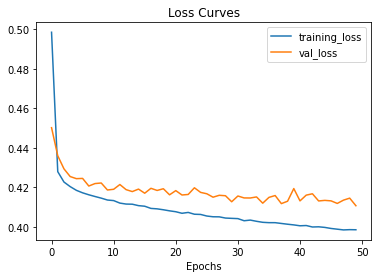

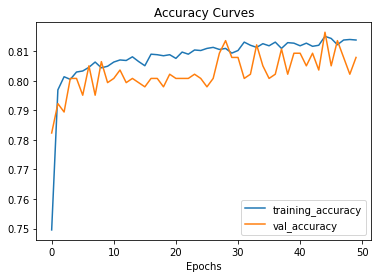

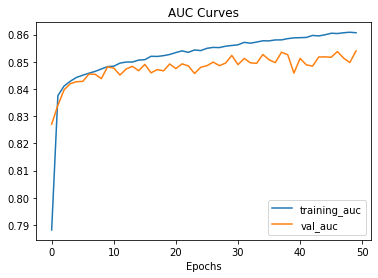

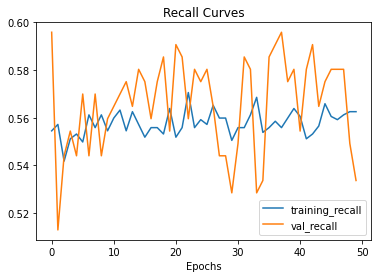

In [51]:
print("Base Functional Model")
plot_loss_curves(fun_history)

In [52]:
#classification report

thre = 0.5
res2 = fun_model.predict(X_val_trf)
res2 = (res2 > thre).T
res2 = res2.astype(int)[0]

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res2))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       510
           1       0.70      0.53      0.60       193

    accuracy                           0.81       703
   macro avg       0.77      0.72      0.74       703
weighted avg       0.80      0.81      0.80       703



# 9. Model Evaluation

In general, when viewed from the model and dataset. Functional models with SGD optimizer have better performance with an accuracy rate of 81%. However, the drawback is that the recall performance is smaller than the Sequential Model with the Adam optimizer whose Recall value is 55%.

However, Functional and Sequential also have differences in Layers that allow us to make improvements to the model by finding the best parameters. On the other hand, the data set that we have is also an unbalanced data set so that we can also make improvements to the data set.

### SMOTE

In [54]:
#smote
smote = SMOTE(sampling_strategy='minority', random_state=33)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#pipeline
X_train_smote_trf = base_pipeline.transform(X_train_smote)

## **Sequential API**

In the improvement model, we will only try to use the sequential api because it has more stable results than the functional api.

### First Improvement

**4 Dense Layer (100-50-20-1)**

With Activation = Elu & SGD Optimizer

In [68]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
#model
smote_model = Sequential()
smote_model.add(Dense(100, activation='elu', input_shape=(30,)))
smote_model.add(Dense(50, activation='elu'))
smote_model.add(Dense(20, activation='elu'))
smote_model.add(Dense(1, activation='sigmoid'))

#compile // training
smote_model.compile(loss="binary_crossentropy",
              optimizer="SGD",
              metrics=metrics_list)

#result // evaluation
smote_history = smote_model.fit(X_train_smote_trf, y_train_smote, epochs=50,
                    validation_data=(X_val_trf, y_val))

Epoch 1/50
259/259 [==============================] - 2s 6ms/step - loss: 0.5066 - auc: 0.8388 - accuracy: 0.7566 - recall: 0.8214 - val_loss: 0.5452 - val_auc: 0.8118 - val_accuracy: 0.7297 - val_recall: 0.7461
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4238 - auc: 0.8887 - accuracy: 0.8067 - recall: 0.8465 - val_loss: 0.5011 - val_auc: 0.8163 - val_accuracy: 0.7511 - val_recall: 0.7047
Epoch 3/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4060 - auc: 0.8976 - accuracy: 0.8160 - recall: 0.8395 - val_loss: 0.5000 - val_auc: 0.8203 - val_accuracy: 0.7511 - val_recall: 0.7150
Epoch 4/50
259/259 [==============================] - 1s 4ms/step - loss: 0.3966 - auc: 0.9023 - accuracy: 0.8212 - recall: 0.8438 - val_loss: 0.4838 - val_auc: 0.8214 - val_accuracy: 0.7496 - val_recall: 0.6788
Epoch 5/50
259/259 [==============================] - 1s 4ms/step - loss: 0.3904 - auc: 0.9055 - accuracy: 0.8245 - recall: 0.8467 - val_loss: 0.4857 - 

Improvement Model *Smote


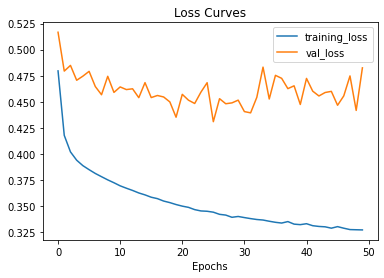

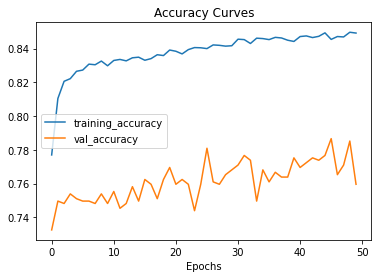

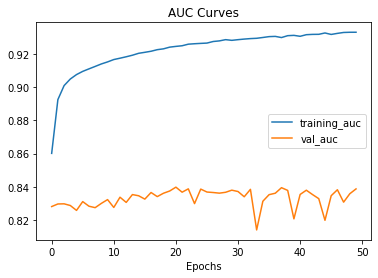

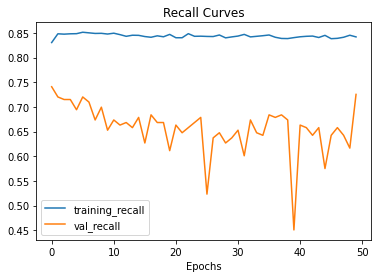

In [57]:
print("Improvement Model *Smote")
plot_loss_curves(smote_history)

In [70]:
#classification report

thre = 0.5
res3 = smote_model.predict(X_val_trf)
res3 = (res3 > thre).T
res3 = res3.astype(int)[0]

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res3))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       510
           1       0.58      0.72      0.64       193

    accuracy                           0.78       703
   macro avg       0.73      0.76      0.74       703
weighted avg       0.80      0.78      0.79       703



In the first improvement model with the data train that has been carried out by SMOTE, there is an improvement in the prediction of scores for customers who did churn but there is also a decrease in scores for customers who did not churn and its precision+f1-score.

### Second Improvement

**4 Dense Layer (100-Normalization-50-DropOut-20-1)**

With Activation = Elu & Adam Optimizer

In [73]:
#clear + random
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
#SequentialModel

sec_model = Sequential()
sec_model.add(Dense(100, activation='elu', input_shape=(30,)))
sec_model.add(BatchNormalization())
sec_model.add(Dense(50, activation='elu'))
sec_model.add(Dropout(rate=0.2))
sec_model.add(Dense(20, activation='elu'))
sec_model.add(Dense(1, activation='sigmoid'))

sec_model.summary()

#compile // training
sec_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=metrics_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                        

In [76]:
#callback (optional)
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
callback2 = tf.keras.callbacks.ModelCheckpoint(
    "sec_model.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

#result // evaluation
sec_history = sec_model.fit(X_train_smote_trf, y_train_smote, epochs=50,
                    validation_data=(X_val_trf, y_val))

Epoch 1/50
259/259 [==============================] - 3s 7ms/step - loss: 0.4410 - auc: 0.8749 - accuracy: 0.7929 - recall: 0.8101 - val_loss: 0.4889 - val_auc: 0.8153 - val_accuracy: 0.7511 - val_recall: 0.6788
Epoch 2/50
259/259 [==============================] - 1s 5ms/step - loss: 0.3982 - auc: 0.9007 - accuracy: 0.8188 - recall: 0.8312 - val_loss: 0.4676 - val_auc: 0.8228 - val_accuracy: 0.7553 - val_recall: 0.6321
Epoch 3/50
259/259 [==============================] - 1s 5ms/step - loss: 0.3835 - auc: 0.9081 - accuracy: 0.8277 - recall: 0.8373 - val_loss: 0.4720 - val_auc: 0.8268 - val_accuracy: 0.7624 - val_recall: 0.6839
Epoch 4/50
259/259 [==============================] - 1s 5ms/step - loss: 0.3729 - auc: 0.9134 - accuracy: 0.8303 - recall: 0.8351 - val_loss: 0.4615 - val_auc: 0.8241 - val_accuracy: 0.7596 - val_recall: 0.6321
Epoch 5/50
259/259 [==============================] - 1s 5ms/step - loss: 0.3672 - auc: 0.9156 - accuracy: 0.8324 - recall: 0.8305 - val_loss: 0.4564 - 

Second Improvement Model with SMOTE


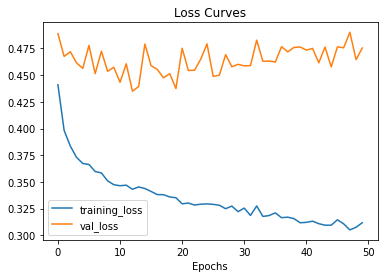

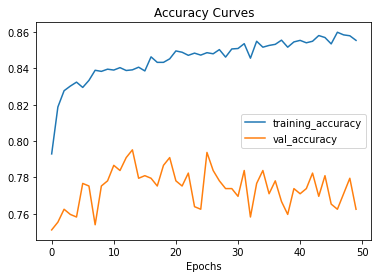

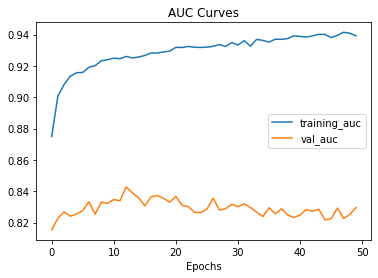

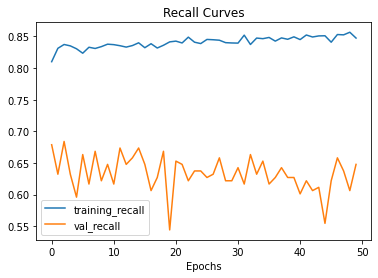

In [77]:
print("Second Improvement Model with SMOTE")
plot_loss_curves(sec_history)

In [78]:
#classification report

thre = 0.5
res4 = sec_model.predict(X_val_trf)
res4 = (res4 > thre).T
res4 = res4.astype(int)[0]

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res4))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       510
           1       0.56      0.65      0.60       193

    accuracy                           0.76       703
   macro avg       0.71      0.73      0.72       703
weighted avg       0.78      0.76      0.77       703



So unfortunately our best optimzer is SGD since kita memakai Adam Optimizer yang terjadi justru terdapat pengurangan nilai score Recall nya.

### Third Improvement

**4 Dense (30-Normalization-50-100-Normalization-50-DropOut-20-1)**

With Elu as Activasion & SGD Optimizer

In [100]:
#clear + random
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
#SequentialModel

th_model = Sequential()
th_model.add(Dense(30, activation='elu', input_shape=(30,)))
th_model.add(BatchNormalization())
th_model.add(Dense(50, activation='elu'))
th_model.add(Dropout(rate=0.2))
th_model.add(Dense(100, activation='elu'))
th_model.add(BatchNormalization())
th_model.add(Dense(50, activation='elu'))
th_model.add(Dropout(rate=0.2))
th_model.add(Dense(20, activation='elu'))
th_model.add(Dense(1, activation='sigmoid'))

th_model.summary()

#compile // training
th_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer="sgd",
              metrics=metrics_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                1550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

In [102]:
#callback (optional)
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
callback2 = tf.keras.callbacks.ModelCheckpoint(
    "th_model.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

#result // evaluation
th_history = th_model.fit(X_train_smote_trf, y_train_smote, epochs=50,
                    validation_data=(X_val_trf, y_val))

Epoch 1/50
259/259 [==============================] - 3s 7ms/step - loss: 0.4870 - auc: 0.8496 - accuracy: 0.7753 - recall: 0.7796 - val_loss: 0.5261 - val_auc: 0.8232 - val_accuracy: 0.7568 - val_recall: 0.7824
Epoch 2/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4448 - auc: 0.8750 - accuracy: 0.7988 - recall: 0.8191 - val_loss: 0.4994 - val_auc: 0.8223 - val_accuracy: 0.7511 - val_recall: 0.7254
Epoch 3/50
259/259 [==============================] - 2s 6ms/step - loss: 0.4270 - auc: 0.8849 - accuracy: 0.8108 - recall: 0.8266 - val_loss: 0.5019 - val_auc: 0.8264 - val_accuracy: 0.7582 - val_recall: 0.7254
Epoch 4/50
259/259 [==============================] - 2s 9ms/step - loss: 0.4181 - auc: 0.8901 - accuracy: 0.8142 - recall: 0.8298 - val_loss: 0.4877 - val_auc: 0.8277 - val_accuracy: 0.7639 - val_recall: 0.7202
Epoch 5/50
259/259 [==============================] - 3s 10ms/step - loss: 0.4126 - auc: 0.8931 - accuracy: 0.8104 - recall: 0.8295 - val_loss: 0.4881 -

Third Improvement Model with SMOTE


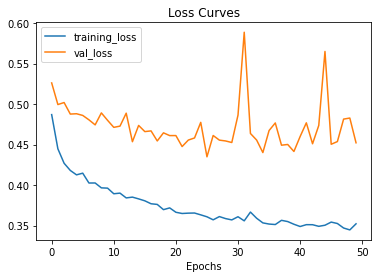

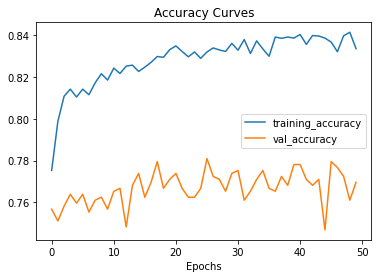

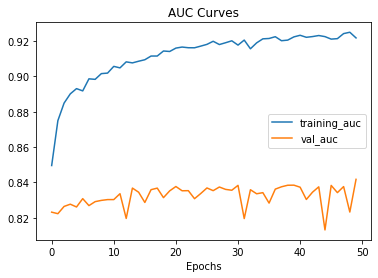

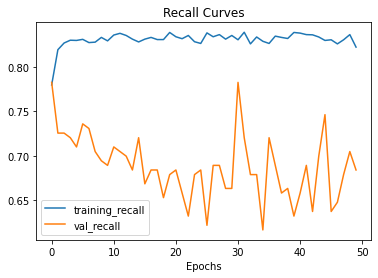

In [103]:
print("Third Improvement Model with SMOTE")
plot_loss_curves(th_history)

In [104]:
#classification report

thre = 0.5
res5 = th_model.predict(X_val_trf)
res5 = (res5 > thre).T
res5 = res5.astype(int)[0]

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res5))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       510
           1       0.57      0.68      0.62       193

    accuracy                           0.77       703
   macro avg       0.72      0.74      0.73       703
weighted avg       0.79      0.77      0.78       703



### Fourth Improvement

**4 Dense (30-Normalization-50-100-Normalization-50-DropOut-20-1)**

With Relu as Activation & SGD Optimizer

In [106]:
#clear + random
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
#SequentialModel

fourth_model = Sequential()
fourth_model.add(Dense(30, activation='relu', input_shape=(30,)))
fourth_model.add(BatchNormalization())
fourth_model.add(Dense(50, activation='relu'))
fourth_model.add(Dropout(rate=0.2))
fourth_model.add(Dense(100, activation='relu'))
fourth_model.add(BatchNormalization())
fourth_model.add(Dense(50, activation='relu'))
fourth_model.add(Dropout(rate=0.2))
fourth_model.add(Dense(20, activation='relu'))
fourth_model.add(Dense(1, activation='sigmoid'))

fourth_model.summary()

#compile // training
fourth_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer="sgd",
              metrics=metrics_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                1550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

In [108]:
#callback (optional)
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
callback2 = tf.keras.callbacks.ModelCheckpoint(
    "fourth_model.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

#result // evaluation
fourth_history = fourth_model.fit(X_train_smote_trf, y_train_smote, epochs=50,
                    validation_data=(X_val_trf, y_val))

Epoch 1/50
259/259 [==============================] - 3s 8ms/step - loss: 0.5508 - auc: 0.8016 - accuracy: 0.7311 - recall: 0.7030 - val_loss: 0.5599 - val_auc: 0.8039 - val_accuracy: 0.7283 - val_recall: 0.7668
Epoch 2/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4769 - auc: 0.8536 - accuracy: 0.7801 - recall: 0.7930 - val_loss: 0.5197 - val_auc: 0.8173 - val_accuracy: 0.7568 - val_recall: 0.7668
Epoch 3/50
259/259 [==============================] - 2s 6ms/step - loss: 0.4497 - auc: 0.8708 - accuracy: 0.8004 - recall: 0.8133 - val_loss: 0.5172 - val_auc: 0.8209 - val_accuracy: 0.7639 - val_recall: 0.7720
Epoch 4/50
259/259 [==============================] - 2s 6ms/step - loss: 0.4386 - auc: 0.8782 - accuracy: 0.8051 - recall: 0.8235 - val_loss: 0.5119 - val_auc: 0.8214 - val_accuracy: 0.7639 - val_recall: 0.7513
Epoch 5/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4294 - auc: 0.8836 - accuracy: 0.8073 - recall: 0.8237 - val_loss: 0.5057 - 

Fourth Improvement Model with SMOTE


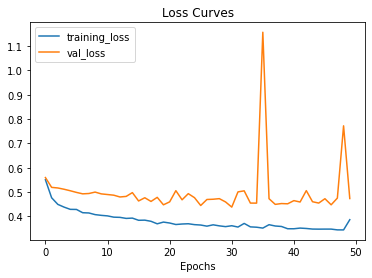

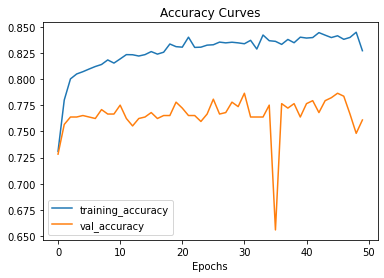

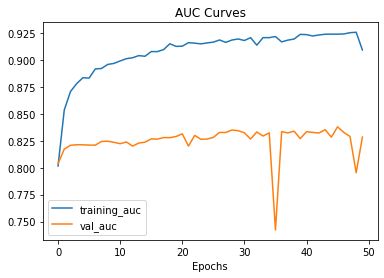

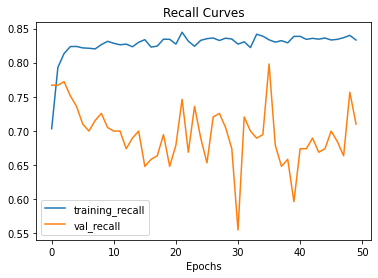

In [109]:
print("Fourth Improvement Model with SMOTE")
plot_loss_curves(fourth_history)

In [110]:
#classification report

thre = 0.5
res6 = fourth_model.predict(X_val_trf)
res6 = (res6 > thre).T
res6 = res6.astype(int)[0]

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res6))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       510
           1       0.55      0.71      0.62       193

    accuracy                           0.76       703
   macro avg       0.71      0.75      0.72       703
weighted avg       0.79      0.76      0.77       703



### Fifth Improvement

**4 Dense (30-Normalization-50-100-Normalization-DropOut-50-DropOut-20-1)**

With Relu as Activation & SGD Optimizer

In [112]:
#clear + random
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [113]:
#SequentialModel

fifth_model = Sequential()
fifth_model.add(Dense(30, activation='relu', input_shape=(30,)))
fifth_model.add(BatchNormalization())
fifth_model.add(Dense(50, activation='relu'))
fifth_model.add(Dropout(rate=0.2))
fifth_model.add(Dense(100, activation='relu'))
fifth_model.add(BatchNormalization())
fifth_model.add(Dropout(rate=0.2))
fifth_model.add(Dense(50, activation='relu'))
fifth_model.add(Dropout(rate=0.2))
fifth_model.add(Dense(20, activation='relu'))
fifth_model.add(Dense(1, activation='sigmoid'))

fifth_model.summary()

#compile // training
fifth_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer="sgd",
              metrics=metrics_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                1550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

In [114]:
#callback (optional)
callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
callback2 = tf.keras.callbacks.ModelCheckpoint(
    "fifth_model.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

#result // evaluation
fifth_history = fifth_model.fit(X_train_smote_trf, y_train_smote, epochs=50,
                    validation_data=(X_val_trf, y_val))

Epoch 1/50
259/259 [==============================] - 3s 7ms/step - loss: 0.5661 - auc: 0.7877 - accuracy: 0.7197 - recall: 0.6937 - val_loss: 0.5648 - val_auc: 0.8052 - val_accuracy: 0.7255 - val_recall: 0.7824
Epoch 2/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4904 - auc: 0.8456 - accuracy: 0.7781 - recall: 0.7898 - val_loss: 0.5266 - val_auc: 0.8164 - val_accuracy: 0.7511 - val_recall: 0.7565
Epoch 3/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4623 - auc: 0.8645 - accuracy: 0.7933 - recall: 0.8075 - val_loss: 0.5225 - val_auc: 0.8194 - val_accuracy: 0.7553 - val_recall: 0.7617
Epoch 4/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4500 - auc: 0.8717 - accuracy: 0.7966 - recall: 0.8138 - val_loss: 0.5151 - val_auc: 0.8179 - val_accuracy: 0.7639 - val_recall: 0.7668
Epoch 5/50
259/259 [==============================] - 1s 6ms/step - loss: 0.4414 - auc: 0.8767 - accuracy: 0.7983 - recall: 0.8160 - val_loss: 0.5061 - 

Fifth Improvement Model with SMOTE


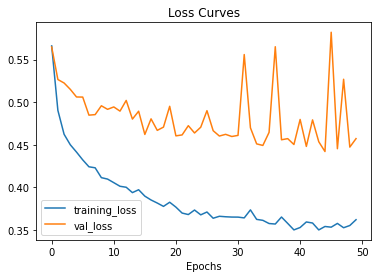

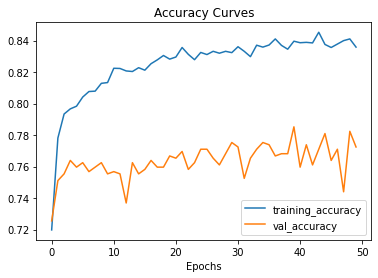

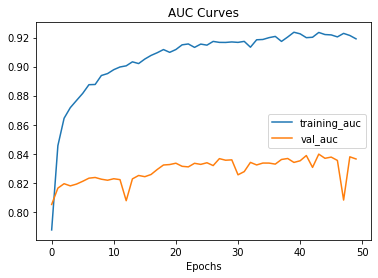

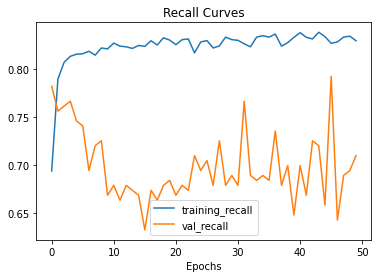

In [115]:
print("Fifth Improvement Model with SMOTE")
plot_loss_curves(fifth_history)

In [116]:
#classification report

thre = 0.5
res7 = fifth_model.predict(X_val_trf)
res7 = (res7 > thre).T
res7 = res7.astype(int)[0]

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_val, res7))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       510
           1       0.57      0.71      0.63       193

    accuracy                           0.77       703
   macro avg       0.72      0.75      0.73       703
weighted avg       0.79      0.77      0.78       703



# 10. Model Saving

### **Future Work**

In general, from the first improvement model to the last or fifth improvement model, we have been able to show that the model we created is still ongoing and can still be improved to produce the best recall score.

Things we can improve include improving the numbers on the hidden layer because I feel the model is starting to overfit in the early-mid testing so that further improvements can start from there. Plus we haven't tried many other activators and optimizers so (again) the model can still be improvised.

On the other hand, the dataset we have is a tubular dataset which is a dataset that is rarely modeled using Tensorflow Deep Learning.

In [122]:
#save pipeline with predictor

full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", fifth_model)
    ])

import joblib
joblib.dump(full_pipeline_with_predictor, 'pipe.pkl')

#save model only
fifth_model.save("best_model.h5")

Assets written to: ram://d4a2db9f-bec3-4631-974e-212843eeb2bd/assets


# 11. Model Inference

**New Data**

In [125]:
random_data = X_merge.iloc[:5]
random_data.head(6)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,partner,dependents,phone_service,multiple_lines_nophoneservice,multiple_lines,internet_service,no_internet_service,onlinesecurity_nois,onlinesecurity,onlinebackup_nois,onlinebackup,deviceprotection_nois,deviceprotection,techsupport_nois,techsupport,streamingtv_nois,streamingtv,streamingmovies_nois,streamingmovies,oneyear_contract,twoyear_contract,paperless_billing,payment_creditcard,payment_echeck,payment_mailcheck
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


**Comparing Its Result (Original vs Model Predict)**

In [127]:
new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,Male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,Male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,Male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,Female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [126]:
fifth_model.predict(random_data)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# 12. Conclusion

I have not mad any conclusion, yet. But for the records I have wrote my hyphothesis for our Deep Learning Model on the Model Improvement-Sub